<a href="https://colab.research.google.com/github/jaishruti/Influence-Maximization/blob/main/InfluenceMaxLatest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Graph formation

In [14]:
import networkx as nx

#specifying path to edge list file
path_dataset = 'sample_data/Dataset1.txt'

#reading edge-list for graph formation
graph = nx.read_edgelist(path_dataset, create_using = nx.Graph(), nodetype=str)

num_of_nodes = graph.number_of_nodes()
count_edges = graph.number_of_edges()
#displaying graph info
print("Number of nodes: ", num_of_nodes)
print("Number of edges: ", count_edges)

#visualising graph
# nx.draw_networkx(graph)
#using list comphrehension
nodes = [node for node in graph.nodes()]


Number of nodes:  34
Number of edges:  77


#Diffusion Model

In [15]:
def diffusion_threshold_model(threshold, list_of_seed_nodes):
  #access all N seed list
  # threshold = 0.5
  c=0
  activation_fraction=[]
  # print(list_of_seed_nodes)
  for i in list_of_seed_nodes:
    # print(i)
    c+=1
    # print("\n-----Iter ",c,"-----")
    # print(num_of_nodes)
    state = [0]*num_of_nodes
    weighted_value = [threshold]*num_of_nodes

    #change state of seed nodes in i
    for n in i:
      # print("New: ",n)
      state[int(n)] = 1
    # print(state)

    #to track num of activated nodes 
    count_activated_nodes = state.count(1)
    prev_count_activated_nodes = 0

    #diffusion threshold model
    t=0
    while prev_count_activated_nodes !=  count_activated_nodes:
      t+=1
      # print("hi")
      # print("--------",t,"-------")

      prev_count_activated_nodes = count_activated_nodes

      for node in graph.nodes():

        #execute if state of node is 0
        if state[int(node)] != 1:
          count_active_neighbors = 0 
          count_neighbors = 0

          #count active neighbors

          for n in graph.neighbors(node):
            if state[int(n)] == 1:
              count_active_neighbors += 1
            count_neighbors += 1
          
          #calculate weighted value
          weighted_value[int(node)] = count_active_neighbors / count_neighbors
          # print(f'weighted value of {node}: {weighted_value[int(node)]}')

          if weighted_value[int(node)] >= threshold:
            state[int(node)] = 1

      count_activated_nodes = state.count(1)  
      # print("State list: ",state)
      # print("count activated nodes: ", count_activated_nodes)
    af = state.count(1) / num_of_nodes
    activation_fraction.append(af)
    # print("Activation fraction: ",af)  
    
  #call plot function
  return(activation_fraction)

#extract random nodes from given percent

In [16]:
import random

def random_nodes( percent, listt ):
  random_nodes_size = round(percent * num_of_nodes / 100)
  random_nodes = random.sample(listt, random_nodes_size)
  # print(random_nodes)
  return random_nodes

# random_node = random_nodes( 15 )


#forming global list for 10 simulations for different size

In [17]:
def random_30_nodes(seed_size_list):
  percent = round(30 * num_of_nodes / 100)
  
  dictt= {}
  for i in seed_size_list:
    nodes_30_listt = []
    for j in range(10):
      nodes_30_listt.append(random_nodes(30, nodes))
    dictt[i] = nodes_30_listt
  print(dictt)
  return dictt

# random_30_nodes([5,7,10,15])

#finding max af out of listt of afs and returns [af,seedset]


In [18]:
def find_max_af(listt, random_seeding_listt):
  max = 0
  seed_set = []
  max_af_listt = [] #[af, seed set]
  for i in range(len(listt)):
    af =listt[i]
    if af > max:
      max=af
      seed_set = random_seeding_listt[i]
  
  max_af_listt.append(max)
  max_af_listt.append(seed_set)
  return max_af_listt

#Seeding_strategies

#Random seeding strategy


In [19]:
def random_seeding(threshold, seed_size_list): #returns activated nodes fractions for seed set 5%,7%,10%,15%
  
  dictt = {}
  max_af_seedset_listt=[]
  random_seeding_listt = []

  for i in seed_size_list:
    # random_seeding_listt = []
    for j in range(10):
      rnodes = random_nodes(i, random30[j])
      random_seeding_listt.append(rnodes)
    # print("Random seeding: ")
    # print(random_seeding_listt)
    af = diffusion_threshold_model(threshold, random_seeding_listt)
    max_af_seedset_listt = find_max_af(af,random_seeding_listt)
    random_seeding_listt.clear()
    #{seed_percent: [af, seed set]}
    dictt[i] = max_af_seedset_listt


  print("Random seeding strategy: ",dictt)

  return dictt



#One-hop strategy

In [38]:
def OneHop(threshold, seed_size_list):
  dictt = {}
  max_af_seedset_listt=[]
  random_seeding_listt = []

  for i in seed_size_list:
    random_seeding_listt = []
    for j in range(10):
      rnodes = random_nodes(i, random30[j])
      for k in rnodes:
       neighbor = [n for n in graph.neighbors(str(k))]
       random_neighbor = random.choice(neighbor)
       random_seeding_listt.append(random_neighbor)
    print(random_seeding_listt)
    af = diffusion_threshold_model(threshold, random_seeding_listt)
    max_af_seedset_listt = find_max_af(af,random_seeding_listt)
    #{seed_percent: [af, seed set]}
    dictt[i] = max_af_seedset_listt


  print("One-Hop seeding strategy: ",dictt)

  return dictt




#centralities

In [21]:
betweenness = nx.betweenness_centrality(graph)
degreeCentrality = nx.degree_centrality(graph)
closeCentrality = nx.closeness_centrality(graph)
# eigCentrality = nx.eigenvector_centrality(graph)
# Print the betweenness centrality of each node
# for node, centrality in betweenness.items():
#     print(f"Node {node}: {centrality}")

print("Betweeness centrality: ", betweenness)
print("Degree centrality: ", degreeCentrality)
print("Closeness centrality: ", closeCentrality)

Betweeness centrality:  {'0': 0.43764580327080344, '1': 0.053873556998557, '2': 0.1522637085137085, '3': 0.01196188071188071, '4': 0.0006313131313131313, '5': 0.02998737373737374, '6': 0.029987373737373736, '7': 0.0, '8': 0.056737012987012996, '9': 0.0006313131313131313, '10': 0.0, '11': 0.0, '12': 0.04159151034151034, '13': 0.0, '14': 0.02936056998556999, '15': 0.0, '16': 0.14034842472342476, '17': 0.014727633477633473, '18': 0.0008477633477633478, '19': 0.021702140452140455, '20': 0.0017947330447330447, '21': 0.18215788840788844, '22': 0.0, '23': 0.2750556156806156, '24': 0.0, '25': 0.0, '26': 0.0, '27': 0.0, '28': 0.0, '29': 0.01824494949494949, '30': 0.0038404882154882162, '31': 0.0038690476190476187, '32': 0.0022095959595959595, '33': 0.0}
Degree centrality:  {'0': 0.48484848484848486, '1': 0.2727272727272727, '2': 0.30303030303030304, '3': 0.18181818181818182, '4': 0.09090909090909091, '5': 0.12121212121212122, '6': 0.12121212121212122, '7': 0.12121212121212122, '8': 0.1515151515

#one-hop hd

In [39]:
def OneHopHD(threshold, high_degree, between_cent, close_cent, seed_size_list):

  dictt={}
  list_of_seed_nodes = []

  for i in seed_size_list:

    random_seeding_listt = []
    for j in range(10):

      list_of_neighbor = []
      #randomly select 15% of nodes
      random_nodes_15 = random_nodes(30,random30[j])
      
      #selcting random one neighbour of each node in Random_nodes(R)
      selected_neigh = []
      for k in random_nodes_15:
        l=[]
        #forming neighbor list
        for n in graph.neighbors(str(k)):
          l.append(n)
        
        #select randomly 1 neighbor of j 
        random_neighbor = random.choice(l)

        m=len(l)
        while m != 0 and random_neighbor in selected_neigh:
          random_neighbor = random.choice(l)
          m-=1
        selected_neigh.append(random_neighbor)

        #add it to list of neighbors
        list_of_neighbor.append(random_neighbor)


      #degree centrality of selected neighbors
      # dict->key(node), value(degree)
      dict_nodes = {}
      for k in list_of_neighbor:
        if between_cent == 1:
          dict_nodes[k] = betweenness[k]
        if high_degree == 1:
          dict_nodes[k] = degreeCentrality[k]
        # if eig_cent == 1:
        #   dict_nodes[k] = eigCentrality[k]
        if close_cent == 1:
          dict_nodes[k] = closeCentrality[k]
      # print("Neighbor nodes with their degree: ", dict_nodes)

      #get s highest degree nodes from neighbours
      # Sort the dictionary by value in descending order
      sorted_dict = sorted(dict_nodes.items(), key=lambda x: x[1], reverse=True)

      #calulated i percent -> number of nodes
      size = round(i * num_of_nodes / 100)

        # Extract the top k elements using slicing
      top_k = sorted_dict[:size]
        # print("Seed set ", i,": ", top_k)

        #seed set 
      seed_set = []
      for k in top_k:
        seed_set.append(k[0])
      # print("seed_set: ", seed_set)
      list_of_seed_nodes.append(seed_set)

    print("list for diffusion:" ,list_of_seed_nodes)
      #get activation fraction of diffusion
    af = diffusion_threshold_model(threshold, list_of_seed_nodes)
    # activation_fraction_matrix[seed_size] = af
    max_af_seedset_listt = find_max_af(af,list_of_seed_nodes)
    #{seed_percent: [af, seed set]}
    dictt[i] = max_af_seedset_listt
    list_of_seed_nodes.clear()


  print("One-HopHD seeding strategy: ",dictt)
  return dictt

oneHopHd = OneHopHD(0.4 , 1,0,0,[5,10,15,20])
print("OnehopHD: ", oneHopHd)

list for diffusion: [['0', '23'], ['23', '0'], ['23', '21'], ['23', '21'], ['23', '0'], ['0', '23'], ['0', '23'], ['0', '23'], ['0', '23'], ['0', '21']]
list for diffusion: [['0', '23', '2'], ['0', '23', '2'], ['23', '0', '21'], ['0', '21', '1'], ['0', '23', '21'], ['23', '0', '2'], ['0', '23', '21'], ['23', '0', '21'], ['23', '0', '21'], ['23', '21', '2']]
list for diffusion: [['0', '23', '2', '1', '3'], ['0', '23', '2', '1', '12'], ['21', '2', '16', '3', '17'], ['0', '21', '8', '29', '31'], ['23', '0', '21', '2', '1'], ['23', '0', '21', '2', '1'], ['0', '23', '21', '2', '1'], ['0', '23', '21', '29', '19'], ['0', '23', '21', '16', '31'], ['23', '0', '21', '2', '3']]
list for diffusion: [['23', '0', '21', '2', '1', '16', '29'], ['23', '0', '21', '2', '3', '29', '5'], ['0', '23', '21', '2', '3', '5', '17'], ['23', '21', '2', '3', '16', '8', '6'], ['0', '23', '21', '1', '16', '7', '6'], ['0', '23', '21', '2', '1', '3', '29'], ['0', '23', '2', '1', '5', '7', '30'], ['0', '23', '21', '2', 

In [37]:
def hd_bc_cc(threshold, seed_size_list):
  seed_af=[]
  dictt = {}
  for i in seed_size_list:
    size_seedset = round(i * num_of_nodes / 300)
    sorted_betweeness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
    sorted_degree = sorted(degreeCentrality.items(), key=lambda x: x[1], reverse=True)
    sorted_close = sorted(closeCentrality.items(), key=lambda x: x[1], reverse=True)
    top_hd = sorted_degree[:size_seedset]
    seed_set = []
    for k in top_hd:
      seed_set.append(k[0])
    print(sorted_betweeness)

    copy_size = size_seedset
    # seed_set_bc=[]
    for node in sorted_betweeness:
      if copy_size == 0:
        break
      if node[0] not in seed_set:
        seed_set.append(node[0])
        copy_size = copy_size - 1

    copy_size = size_seedset
    for node in sorted_close:
      if copy_size == 0:
        break
      if node[0] not in seed_set:
        seed_set.append(node[0])
        copy_size = copy_size - 1

    print("Seed set formed: ",i,":: ", seed_set)

    
    
    #{seed_percent: [af, seed set]}
    seed_af.append(seed_set)
    seed_set.clear()

  af = diffusion_threshold_model(threshold, seed_af)
  print("Af: ",af)
  print("HD_BC_CC seeding strategy: ",dictt)
  return dictt

out = hd_bc_cc(0.4 , [5,10,15,20])
print("HD_bc_cc: ", out)



[('0', 0.43764580327080344), ('23', 0.2750556156806156), ('21', 0.18215788840788844), ('2', 0.1522637085137085), ('16', 0.14034842472342476), ('8', 0.056737012987012996), ('1', 0.053873556998557), ('12', 0.04159151034151034), ('5', 0.02998737373737374), ('6', 0.029987373737373736), ('14', 0.02936056998556999), ('19', 0.021702140452140455), ('29', 0.01824494949494949), ('17', 0.014727633477633473), ('3', 0.01196188071188071), ('31', 0.0038690476190476187), ('30', 0.0038404882154882162), ('32', 0.0022095959595959595), ('20', 0.0017947330447330447), ('18', 0.0008477633477633478), ('4', 0.0006313131313131313), ('9', 0.0006313131313131313), ('7', 0.0), ('10', 0.0), ('11', 0.0), ('13', 0.0), ('15', 0.0), ('22', 0.0), ('24', 0.0), ('25', 0.0), ('26', 0.0), ('27', 0.0), ('28', 0.0), ('33', 0.0)]
Seed set formed:  5 ::  ['0', '23', '2']
[('0', 0.43764580327080344), ('23', 0.2750556156806156), ('21', 0.18215788840788844), ('2', 0.1522637085137085), ('16', 0.14034842472342476), ('8', 0.0567370129

#calling seeding strategy

In [23]:
def seeding_strategies(percent):
  listt = []
  for i in range(10):
    random_30 = random_nodes(percent , nodes)
    listt.append(random_30)
  # print(listt)
  return listt

random30 = seeding_strategies(30)





In [24]:
threshold = 0.6
seed_size_percent = [5,10,15,20]

random_seed = random_seeding(threshold , seed_size_percent)
print("Random seeding: ", random_seed)
oneHop = OneHop(threshold , seed_size_percent)
print("Onehop: ", oneHop)
oneHopHd = OneHopHD(threshold , 1,0,0,seed_size_percent)
print("OnehopHD: ", oneHopHd)
oneHopBc = OneHopHD(threshold , 0,1,0,seed_size_percent)
print("OnehopBC: ", oneHopBc)
oneHopCc = OneHopHD(threshold , 0,0,1,seed_size_percent)
print("OnehopBC: ", oneHopCc)

Random seeding strategy:  {5: [0.058823529411764705, ['13', '22']], 10: [0.14705882352941177, ['23', '1', '16']], 15: [0.3235294117647059, ['0', '18', '23', '1', '31']], 20: [0.23529411764705882, ['14', '22', '10', '31', '23', '0', '13']]}
Random seeding:  {5: [0.058823529411764705, ['13', '22']], 10: [0.14705882352941177, ['23', '1', '16']], 15: [0.3235294117647059, ['0', '18', '23', '1', '31']], 20: [0.23529411764705882, ['14', '22', '10', '31', '23', '0', '13']]}
One-Hop seeding strategy:  {5: [0.11764705882352941, '30'], 10: [0.11764705882352941, '30'], 15: [0.11764705882352941, '30'], 20: [0.11764705882352941, '30']}
Onehop:  {5: [0.11764705882352941, '30'], 10: [0.11764705882352941, '30'], 15: [0.11764705882352941, '30'], 20: [0.11764705882352941, '30']}
[['23', '0'], ['0', '23'], ['0', '23'], ['23', '0'], ['0', '23'], ['0', '23'], ['0', '23'], ['0', '23'], ['23', '21'], ['0', '23']]
[['0', '23', '21'], ['23', '0', '2'], ['0', '23', '21'], ['23', '21', '2'], ['23', '0', '21'], ['

#Plotting strategy




#extract activated fraction

In [25]:
def extract_activated_fraction(dictt):
  af = list(dictt.values())
  y=[]
  for i in af:
    y.append(i[0])
  print(y)
  return y


#plot graph

[0.058823529411764705, 0.14705882352941177, 0.3235294117647059, 0.23529411764705882]
[0.11764705882352941, 0.11764705882352941, 0.11764705882352941, 0.11764705882352941]
[0.20588235294117646, 0.35294117647058826, 0.6764705882352942, 1.0]
[0.20588235294117646, 0.35294117647058826, 0.6764705882352942, 1.0]
[0.11764705882352941, 0.35294117647058826, 0.6764705882352942, 0.9117647058823529]


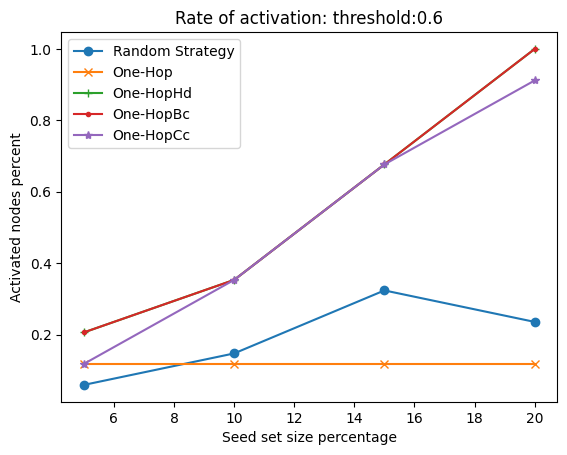

In [26]:
import matplotlib.pyplot as plt
import numpy as np


def plotting_graph(threshold, random, oneHop, oneHopHd):
  seed_set_sizes = [5,10,15,20]
  x = np.array(seed_set_sizes)
  y = extract_activated_fraction(random)
  plt.plot(x,y,label="Random Strategy", marker = 'o', )

  z = extract_activated_fraction(oneHop)
  plt.plot(x,z,label="One-Hop", marker = 'x', )

  h = extract_activated_fraction(oneHopHd)
  plt.plot(x,h,label="One-HopHd", marker = '+', )

  b = extract_activated_fraction(oneHopBc)
  plt.plot(x,b,label="One-HopBc", marker = '.', )

  c = extract_activated_fraction(oneHopCc)
  plt.plot(x,c,label="One-HopCc", marker = '*', )

  plt.title(f"Rate of activation: threshold:{threshold}")
  plt.xlabel(f"Seed set size percentage")
  plt.ylabel("Activated nodes percent")
  plt.legend()
  plt.show()

threshold = 0.6
plotting_graph(threshold , random_seed, oneHop, oneHopHd)
